In [1]:
#NOTE : Chi Du Doan duoc so ngay tiep theo vi data con it  

In [2]:
import pyodbc
import pandas as pd

In [3]:
server = '172.20.02.110' 
database = 'RecommendDB' 
username = 'longth17' 
password = 'rm!t1997' 
cnxn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()

In [4]:
df = pd.read_sql_query('select * from PBI_Overview_BoxUsage', cnxn)
df

,Date,Type,DateTime,TotalActive,TotalActiveBox
0,06/04-31/03/2019,Weekly,2019-04-06,764666,863223
1,29-05-2018,Daily,2018-05-29,677481,766182
2,13-04-2020,Daily UserProfile,2020-04-13,1324,1298
3,20-11-2017,Daily UserProfile,2017-11-20,2666,2472
4,28/02-28/01/2019,Monthly,2019-02-28,968772,1124867
...,...,...,...,...,...
5739,30/10-24/10/2019,Weekly UserProfile,2019-10-30,6357,5901
5740,14/10-08/10/2017,Weekly UserProfile,2017-10-14,9853,8892
5741,23/04-23/03/2019,Monthly UserProfile,2019-04-23,26156,22761
5742,15/09-09/09/2019,Weekly UserProfile,2019-09-15,6639,5797


In [5]:
df["DateTime"] = pd.to_datetime(df["DateTime"])

In [6]:
df = df.drop(['Date'],1)

In [7]:
df = df.loc[df['Type'] == 'Daily']

In [8]:
df = df[df['DateTime'] < '2020-05-17']

In [9]:
df = df[df['DateTime'] >= '2020-04-03']

In [10]:
df = df.sort_values('DateTime', ascending = False)

In [11]:
df = df.drop(['Type'],1)

In [12]:
df

,DateTime,TotalActive,TotalActiveBox
2086,2020-05-16,1085908,1201262
2781,2020-05-15,1085138,1200948
3979,2020-05-14,1060296,1169755
5200,2020-05-13,1110616,1232843
3754,2020-05-12,1085211,1201232
455,2020-05-11,1077497,1192738
2452,2020-05-10,1084059,1200091
5339,2020-05-09,1075984,1190623
4581,2020-05-08,1078816,1194697
965,2020-05-07,1086349,1203614


In [13]:
df.dtypes

DateTime          datetime64[ns]
TotalActive                int64
TotalActiveBox             int64
dtype: object

In [14]:
import pandas as pd
import matplotlib as mplt
from matplotlib import pyplot as plt 
import numpy as np 
import seaborn as sns 

In [15]:
sql = """ 
-- # Get View BHD # --
With
ViewFilmBHD as
(select distinct A.CustomerID,A.Ftype, cast(A.Date as date) as Date, B.isDRM from Log_BHD_MovieID A
left join MV_PropertiesshowVN B on A.MovieID = B.Id
where isDRM = 1 and A.Date between '2019-05-01' and getdate()
group by A.MovieID,A.Ftype,A.Date,B.isDRM, A.CustomerID)

--select count(distinct A.Contract) as Number , Date, Ftype
--from ViewMovie A
--group by Date, Ftype
--order by date desc

--#Get View Film Plus # --

, ViewFilmPlus as (select
Distinct CustomerID,
C.FType,
cast(C.Date as Date) as Date,
B.IsDrm
from Log_Fimplus_MovieId C
left join MV_PropertiesshowVN B on C.MovieID = B.Id
where isDRM = 1 and C.Date between '2019-05-01' and getdate()
group by CustomerID, C.Date, B.IsDRM, C.FType )

--select count(distinct C.Contract) as Number , Date, Ftype
--from ViewMovie2 C
--group by Date, Ftype
--order by date desc

-- # Combine View # --
, ViewFilm as (Select distinct v1.CustomerID as CustomerID, Date , Ftype from ViewFilmBHD v1
group by v1.CustomerID, Date, Ftype
union
select distinct v2.CustomerID as Number, Date, Ftype  from ViewFilmPlus v2
group by V2.CustomerID, Date, Ftype
 )

-- Danh Sach K+ / Dac Sac
, CustomersList as
(Select CS.CustomerID,CS.ServiceID
from Customers C join CustomerService CS on c.ID = cs.CustomerID
where C.Status = 1 AND C.AccountType = 1 and (C.SubStatus is null or C.SubStatus =1 )
And c.BoxType = 4 AND (StopDate is null or Stopdate >= Getdate())
And C.ID < 10000000 and cs.ToDate  >=cs.Date AND CS.Enable=1 AND c.LocationID<1000 and C.MAC IS NOT NULL
and ServiceID in (60,89,148,149,150,154))

-- KeyKH Xem DS/K+
, TotalKH as
(select distinct customerID as CustomerID , cast(DateStamp as Date) as Date, MAC from Log_GetDRM_List
where CustomerID != 0
group by CustomerID,Cast(DateStamp as Date), MAC)

-- Mapping --
, Mapping as
(Select Distinct T.CustomerID ,T.MAC, T.Date, ServiceID
from TotalKH T
left join CustomersList L on T.CustomerID = L.CustomerID
where ServiceID is not null
group by T.CustomerID, T.MAC, T.Date, ServiceID )

-- Final Mapping --

, Final_Mapping as
(Select M.CustomerID, Mac, M.Date, ServiceID , F.FType
from Mapping M
left join ViewFilm F on M.CustomerID = F.CustomerID
group by M.CustomerID,M.Mac,M.Date,M.ServiceID,F.Ftype)

,Calculation as
(Select CustomerID, Date From Final_Mapping
Union all
Select CustomerID, Date from ViewFilm
where Date between '2020-4-3' and getdate()
group by CustomerID,Date )

--Lay so Total theo ngay --
Select Sum(Ca.Number) as Total, Ca.Date from
(select count(CustomerID) as Number,Date
From Calculation
Group by Date) Ca
group by Ca.Date
order by Ca.Date desc
""" 
df2 = pd.read_sql_query(sql, cnxn)
df2

,Total,Date
0,4946,2020-05-17
1,23174,2020-05-16
2,18828,2020-05-15
3,18621,2020-05-14
4,18855,2020-05-13
5,17852,2020-05-12
6,18196,2020-05-11
7,20521,2020-05-10
8,19794,2020-05-09
9,18373,2020-05-08


In [16]:
df2["Date"] = pd.to_datetime(df2["Date"])

In [17]:
df2_new = df2[df2['Date'] < '2020-05-17']

In [18]:
df2_new = df2_new[df2_new['Date'] >= '2020-05-01']

In [19]:
df2_new.dtypes

Total             int64
Date     datetime64[ns]
dtype: object

In [20]:
df2_new 

,Total,Date
1,23174,2020-05-16
2,18828,2020-05-15
3,18621,2020-05-14
4,18855,2020-05-13
5,17852,2020-05-12
6,18196,2020-05-11
7,20521,2020-05-10
8,19794,2020-05-09
9,18373,2020-05-08
10,17794,2020-05-07


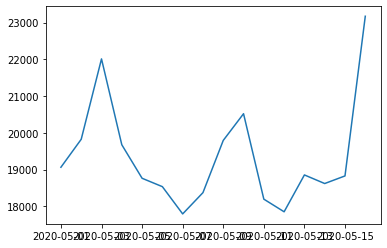

In [20]:
Y = df2_new['Total']
X = df2_new['Date']
plt.plot(X,Y) 

In [21]:
indexed_df2_new = df2_new.set_index(['Date'])

In [40]:
df2_new 

,Total,Date
1,23174,2020-05-16
2,18828,2020-05-15
3,18621,2020-05-14
4,18855,2020-05-13
5,17852,2020-05-12
6,18196,2020-05-11
7,20521,2020-05-10
8,19794,2020-05-09
9,18373,2020-05-08
10,17794,2020-05-07


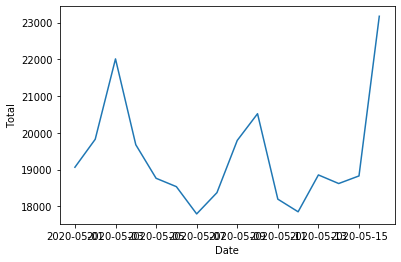

In [41]:
sns.lineplot(x="Date", y="Total", data=df2_new)

In [42]:
indexed_df2_new

,Total
Date,
2020-05-16,23174
2020-05-15,18828
2020-05-14,18621
2020-05-13,18855
2020-05-12,17852
2020-05-11,18196
2020-05-10,20521
2020-05-09,19794
2020-05-08,18373


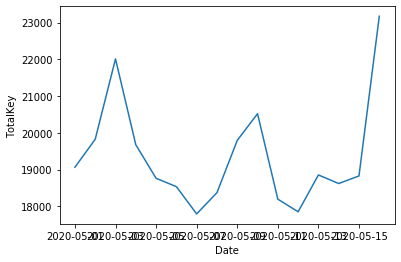

In [43]:
plt.xlabel("Date")
plt.ylabel("TotalKey")
plt.plot(indexed_df2_new)

In [44]:
#Rolling Statistics 
rolmean = indexed_df2_new.rolling(window=2).mean()
rolstd = indexed_df2_new.rolling(window=2).std()
print(rolmean,rolstd)

              Total
Date               
2020-05-16      NaN
2020-05-15  21001.0
2020-05-14  18724.5
2020-05-13  18738.0
2020-05-12  18353.5
2020-05-11  18024.0
2020-05-10  19358.5
2020-05-09  20157.5
2020-05-08  19083.5
2020-05-07  18083.5
2020-05-06  18165.0
2020-05-05  18650.0
2020-05-04  19220.5
2020-05-03  20845.0
2020-05-02  20919.0
2020-05-01  19444.5                   Total
Date                   
2020-05-16          NaN
2020-05-15  3073.086071
2020-05-14   146.371104
2020-05-13   165.462987
2020-05-12   709.228102
2020-05-11   243.244733
2020-05-10  1644.023266
2020-05-09   514.066630
2020-05-08  1004.798736
2020-05-07   409.414826
2020-05-06   524.673232
2020-05-05   161.220346
2020-05-04   645.588491
2020-05-03  1651.801441
2020-05-02  1547.149637
2020-05-01   538.108260


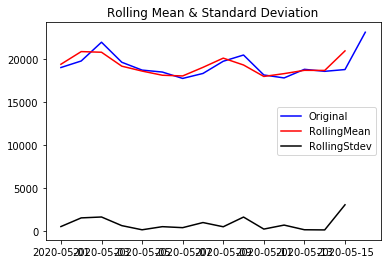

In [45]:
original = plt.plot(indexed_df2_new, color='blue', label='Original')
mean = plt.plot(rolmean,color ='red',label='RollingMean')
std = plt.plot(rolstd, color ='black', label ='RollingStdev')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [46]:
#Dickey-Fuller test ( Stationery Test) 
from statsmodels.tsa.stattools import adfuller 
print('Results of Dickey-FUller Test:')
dftest = adfuller(indexed_df2_new['Total'],autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value 
    
print(dfoutput)

Results of Dickey-FUller Test:
Test Statistic                 -4.275226
p-value                         0.000490
#Lags Used                      0.000000
Number of Observations Used    15.000000
Critical Value (1%)            -3.964443
Critical Value (5%)            -3.084908
Critical Value (10%)           -2.681814
dtype: float64


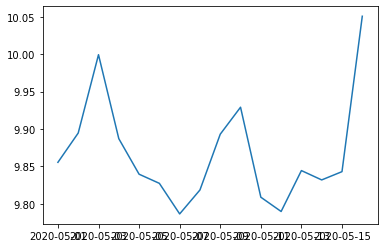

In [47]:
#estimating trend
indexed_df2_new_logScale = np.log(indexed_df2_new)
plt.plot(indexed_df2_new_logScale)

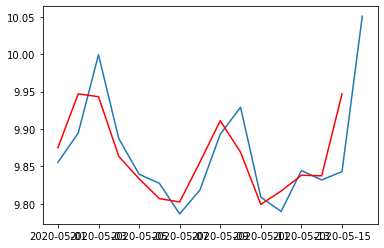

In [48]:
movingAverage= indexed_df2_new_logScale.rolling(window=2).mean()
movingSTD = indexed_df2_new_logScale.rolling(window=2).std()
plt.plot(indexed_df2_new_logScale)
plt.plot(movingAverage, color ='red')

In [49]:
dfLogScaleMinusMA = indexed_df2_new_logScale - movingAverage
dfLogScaleMinusMA.head()
#RemoveNA
dfLogScaleMinusMA.dropna(inplace=True)
dfLogScaleMinusMA

,Total
Date,
2020-05-15,-0.103843
2020-05-14,-0.005528
2020-05-13,0.006244
2020-05-12,-0.027331
2020-05-11,0.009543
2020-05-10,0.060123
2020-05-09,-0.018035
2020-05-08,-0.037248
2020-05-07,-0.016010


In [50]:
from statsmodels.tsa.stattools import adfuller 
def test_stationarity(timeseries):
    #Determining rolling statistics
    movingAverage = timeseries.rolling(window=2).mean()
    movingSTD =timeseries.rolling(window=2).std()
    
    #Plot rolling statistics:
    orig =plt.plot(timeseries, color ='green',label='Original')
    mean =plt.plot(movingAverage,color='red',label='Rolling Mean')
    std =plt.plot(movingSTD, color='black',label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller Test:
    print('Results of DIckey-Fuller Test:')
    dftest = adfuller(timeseries['Total'],autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

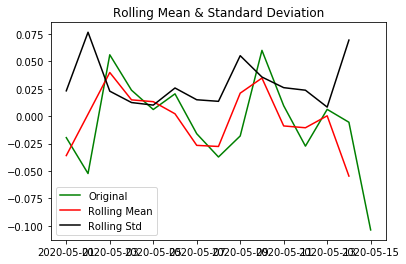

Results of DIckey-Fuller Test:
Test Statistic                 -3.353925
p-value                         0.012633
#Lags Used                      4.000000
Number of Observations Used    10.000000
Critical Value (1%)            -4.331573
Critical Value (5%)            -3.232950
Critical Value (10%)           -2.748700
dtype: float64


In [51]:
test_stationarity(dfLogScaleMinusMA)

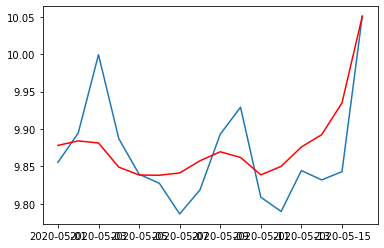

In [52]:
exponentialDecayWeightedAverage = indexed_df2_new_logScale.ewm(halflife=3,min_periods=0,adjust=True).mean()
plt.plot(indexed_df2_new_logScale)
plt.plot(exponentialDecayWeightedAverage,color='red')

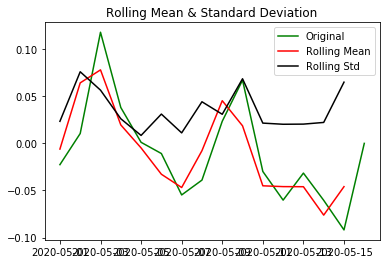

Results of DIckey-Fuller Test:
Test Statistic                -1.478999
p-value                        0.543874
#Lags Used                     6.000000
Number of Observations Used    9.000000
Critical Value (1%)           -4.473135
Critical Value (5%)           -3.289881
Critical Value (10%)          -2.772382
dtype: float64


In [53]:
dfLogScaleMinusMEDA = indexed_df2_new_logScale - exponentialDecayWeightedAverage
test_stationarity(dfLogScaleMinusMEDA)

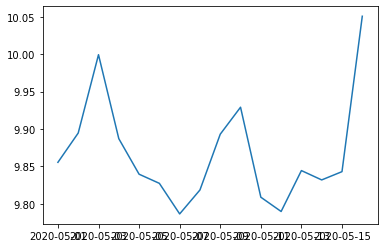

In [54]:
dfLogDiffShifting = indexed_df2_new_logScale - indexed_df2_new_logScale.shift()
plt.plot(indexed_df2_new_logScale)

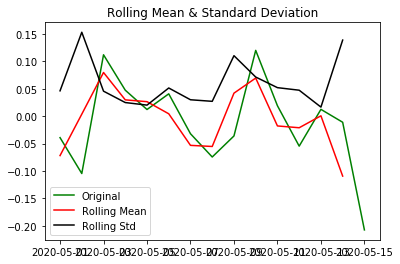

Results of DIckey-Fuller Test:
Test Statistic                 -3.353925
p-value                         0.012633
#Lags Used                      4.000000
Number of Observations Used    10.000000
Critical Value (1%)            -4.331573
Critical Value (5%)            -3.232950
Critical Value (10%)           -2.748700
dtype: float64


In [55]:
dfLogDiffShifting.dropna(inplace=True)
test_stationarity(dfLogDiffShifting)

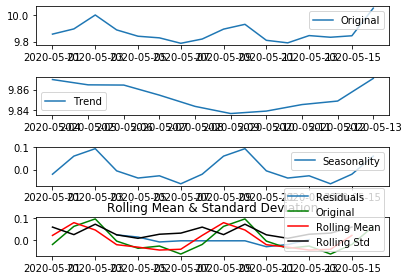

Results of DIckey-Fuller Test:


KeyError: 'Total'

In [56]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexed_df2_new_logScale)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(indexed_df2_new_logScale,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData = seasonal
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)


In [57]:
from statsmodels.tsa.arima_model import ARIMA

/home/maxtran/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  % freq, ValueWarning)
/home/maxtran/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
/home/maxtran/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  % freq, ValueWarning)
/home/maxtran/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
No handles with labels found to put in legend.


Plotting AR Model


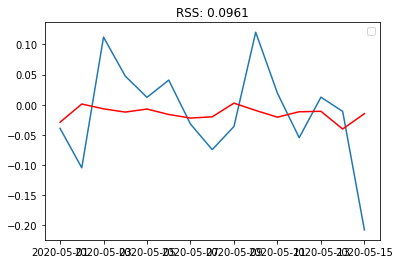

In [58]:
#AR MODEL
model = ARIMA(indexed_df2_new_logScale,order=(0,1,1))
result_AR=model.fit(disp=-1)
plt.plot(dfLogDiffShifting)
plt.plot(result_AR.fittedvalues, color='red')
plt.legend(loc='best')
plt.title('RSS: %.4f'% sum((result_AR.fittedvalues-dfLogDiffShifting['Total'])**2))
print('Plotting AR Model')

/home/maxtran/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  % freq, ValueWarning)
/home/maxtran/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
/home/maxtran/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  % freq, ValueWarning)
/home/maxtran/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
No handles with labels found to put in legend.


Plotting AR Model


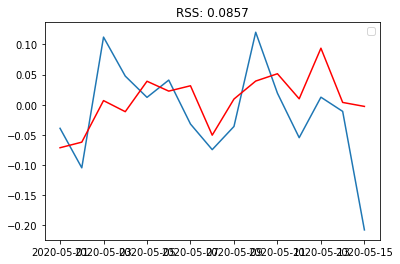

In [59]:
#AR MODEL
model = ARIMA(indexed_df2_new_logScale,order=(0,1,2))
result_AR=model.fit(disp=-1)
plt.plot(dfLogDiffShifting)
plt.plot(result_AR.fittedvalues, color='red')
plt.legend(loc='best')
plt.title('RSS: %.4f'% sum((result_AR.fittedvalues-dfLogDiffShifting['Total'])**2))
print('Plotting AR Model')

/home/maxtran/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  % freq, ValueWarning)
/home/maxtran/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
/home/maxtran/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  % freq, ValueWarning)
/home/maxtran/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
/home/maxtran/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarni

Plotting AR Model


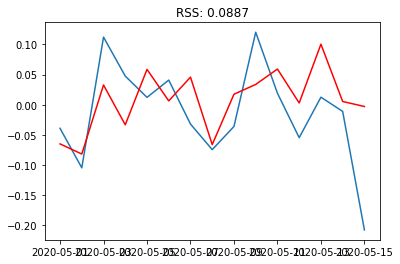

In [60]:
#AR MODEL
model = ARIMA(indexed_df2_new_logScale,order=(0,1,3))
result_AR = model.fit(disp=-1)
plt.plot(dfLogDiffShifting)
plt.plot(result_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((result_AR.fittedvalues-dfLogDiffShifting['Total'])**2))
print('Plotting AR Model')

/home/maxtran/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  % freq, ValueWarning)
/home/maxtran/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
/home/maxtran/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  % freq, ValueWarning)
/home/maxtran/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
No handles with labels found to put in legend.


Plotting AR Model


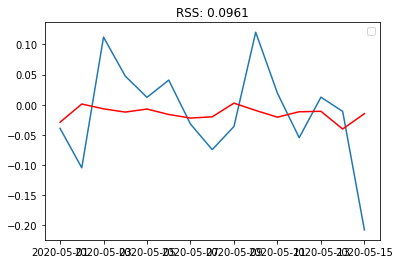

In [61]:
#Choose the best AR Model based on RSS 
model = ARIMA(indexed_df2_new_logScale,order=(0,1,1))
result_AR=model.fit(disp=-1)
plt.plot(dfLogDiffShifting)
plt.plot(result_AR.fittedvalues, color='red')
plt.legend(loc='best')
plt.title('RSS: %.4f'% sum((result_AR.fittedvalues-dfLogDiffShifting['Total'])**2))
print('Plotting AR Model')

In [62]:
predictions_ARIMA_diff = pd.Series(result_AR.fittedvalues,copy=True)
print(predictions_ARIMA_diff.head())

Date
2020-05-15   -0.014834
2020-05-14   -0.040314
2020-05-13   -0.010900
2020-05-12   -0.011688
2020-05-11   -0.020615
dtype: float64


In [63]:
#convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Date
2020-05-15   -0.014834
2020-05-14   -0.055149
2020-05-13   -0.066048
2020-05-12   -0.077737
2020-05-11   -0.098351
dtype: float64


In [64]:
predictions_ARIMA_log =pd.Series(indexed_df2_new_logScale['Total'],index = indexed_df2_new_logScale.index)
predictions_ARIMA_log =predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Date
2020-05-01    9.637878
2020-05-02    9.706094
2020-05-03    9.809613
2020-05-04    9.704229
2020-05-05    9.668944
Freq: D, dtype: float64

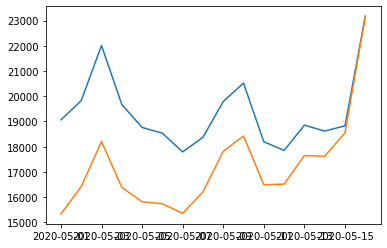

In [65]:
predictions_ARIMA =np.exp(predictions_ARIMA_log)
plt.plot(indexed_df2_new)
plt.plot(predictions_ARIMA)

In [66]:
np.exp(indexed_df2_new_logScale)

,Total
Date,
2020-05-16,23174.0
2020-05-15,18828.0
2020-05-14,18621.0
2020-05-13,18855.0
2020-05-12,17852.0
2020-05-11,18196.0
2020-05-10,20521.0
2020-05-09,19794.0
2020-05-08,18373.0


/home/maxtran/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/home/maxtran/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/home/maxtran/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


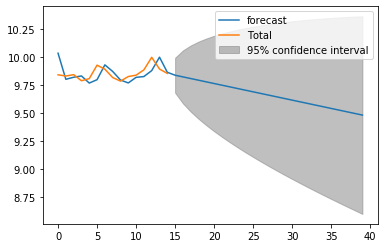

In [70]:
#prediction
result_AR.plot_predict(1,40)
x = result_AR.forecast(steps=7)

In [71]:
result_AR.forecast(steps=7)

(array([9.83936851, 9.82453431, 9.80970011, 9.79486591, 9.7800317 ,
        9.7651975 , 9.7503633 ]),
 array([0.07975306, 0.12061241, 0.15077851, 0.17584357, 0.19775683,
        0.21747315, 0.23554484]),
 array([[ 9.68305538,  9.99568163],
        [ 9.58813832, 10.06093029],
        [ 9.51417966, 10.10522055],
        [ 9.45021884, 10.13951297],
        [ 9.39243543, 10.16762798],
        [ 9.33895797, 10.19143704],
        [ 9.2887039 , 10.21202271]]))

In [72]:
todf = np.exp(x[0])
dudoan=pd.DataFrame(data=todf)
dudoan

,0
0,18757.866800
1,18481.662547
2,18209.525323
3,17941.395242
4,17677.213300
5,17416.921362
6,17160.462149


In [ ]:
#df.to_excel("output.xlsx")

In [ ]:
#df_new = df_new.drop(['Date'],1)

In [ ]:
#df_new.head(5)

In [ ]:
#df_new.dtypes

In [26]:
df_merge = df.merge(df2,left_on='DateTime',right_on='Date')

In [22]:
df_merge = df_merge.drop(['DateTime'],1)

In [23]:
df_merge = df_merge.drop(['Date'],1)

In [27]:
df_merge.head()

,DateTime,TotalActive,TotalActiveBox,Total,Date
0,2020-05-16,1085908,1201262,23174,2020-05-16
1,2020-05-15,1085138,1200948,18828,2020-05-15
2,2020-05-14,1060296,1169755,18621,2020-05-14
3,2020-05-13,1110616,1232843,18855,2020-05-13
4,2020-05-12,1085211,1201232,17852,2020-05-12


In [28]:
df_merge.to_csv("data_outputTime")

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline


In [93]:
scale = StandardScaler()
X= df_merge[['TotalActive','TotalActiveBox']]
Y = df_merge[['Total']]

In [94]:
scaled_DF = scale.fit_transform(df_merge)

In [95]:
scaledX = scale.fit_transform(X)



In [96]:
scaledY = scale.fit_transform(Y)

In [97]:
scaled_DF

array([[-4.76870268e-01, -6.25373483e-01,  8.55224329e-02],
       [-5.17005618e-01, -6.38581163e-01, -1.24547307e+00],
       [-1.81186583e+00, -1.95064212e+00, -1.30886839e+00],
       [ 8.11005348e-01,  7.03007794e-01, -1.23720411e+00],
       [-5.13200578e-01, -6.26635363e-01, -1.54438048e+00],
       [-9.15283810e-01, -9.83915708e-01, -1.43902787e+00],
       [-5.73247231e-01, -6.74628873e-01, -7.26978962e-01],
       [-9.94147166e-01, -1.07287826e+00, -9.49628232e-01],
       [-8.46532477e-01, -9.01514932e-01, -1.38482027e+00],
       [-4.53883658e-01, -5.26442076e-01, -1.56214342e+00],
       [-6.54508284e-01, -7.08236949e-01, -1.33490028e+00],
       [ 2.25550478e-01,  1.81767150e-01, -1.26507355e+00],
       [ 4.79185040e-01,  4.18622062e-01, -9.85460371e-01],
       [-5.64386180e-01, -6.42282678e-01, -2.70042633e-01],
       [-2.52090630e+00, -2.45652989e+00, -9.40134247e-01],
       [-1.70851256e-01, -9.07119783e-03, -1.17319628e+00],
       [-2.09354301e+00, -2.04393713e+00

In [98]:
array_to_df = pd.DataFrame(scaled_DF)

In [99]:
array_to_df

,0,1,2
0,-0.476870,-0.625373,0.085522
1,-0.517006,-0.638581,-1.245473
2,-1.811866,-1.950642,-1.308868
3,0.811005,0.703008,-1.237204
4,-0.513201,-0.626635,-1.544380
5,-0.915284,-0.983916,-1.439028
6,-0.573247,-0.674629,-0.726979
7,-0.994147,-1.072878,-0.949628
8,-0.846532,-0.901515,-1.384820
9,-0.453884,-0.526442,-1.562143


In [100]:
array_to_df = array_to_df.rename(columns={0: 'TotalActive', 1: 'TotalActiveBox',2:'Total'})

In [101]:
array_to_df

,TotalActive,TotalActiveBox,Total
0,-0.476870,-0.625373,0.085522
1,-0.517006,-0.638581,-1.245473
2,-1.811866,-1.950642,-1.308868
3,0.811005,0.703008,-1.237204
4,-0.513201,-0.626635,-1.544380
5,-0.915284,-0.983916,-1.439028
6,-0.573247,-0.674629,-0.726979
7,-0.994147,-1.072878,-0.949628
8,-0.846532,-0.901515,-1.384820
9,-0.453884,-0.526442,-1.562143


In [102]:
array_to_df.corr()['Total'].sort_values()

TotalActive       0.151127
TotalActiveBox    0.202456
Total             1.000000
Name: Total, dtype: float64

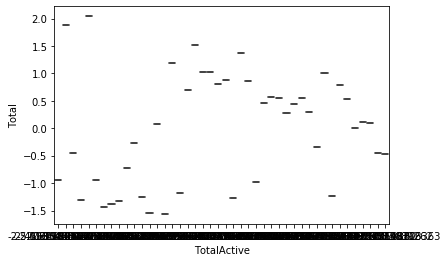

In [106]:
sns.boxplot(x= 'TotalActive', y ='Total', data = array_to_df)


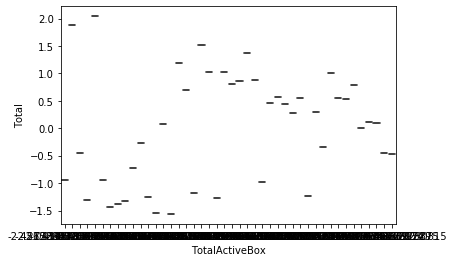

In [108]:
sns.boxplot(x='TotalActiveBox', y ='Total', data = array_to_df)


In [ ]:
#sns.regplot(x='TotalActive', y='Total Key', data=df_new)

In [ ]:
#sns.regplot(x='TotalActiveBox', y='Total Key', data=df_new)

In [ ]:
## Correlation Calculation # 

In [ ]:
#df_new.corr()['Total Key'].sort_values()

In [ ]:
#X = df_new[['TotalActive']]
#Y = df_new['Total Key']
#lm = LinearRegression()
#lm.fit(X,Y)
#lm.score(X, Y)

In [ ]:
#X2 = df_new[['TotalActiveBox']]
#Y2 = df_new['Total Key']
#lm = LinearRegression()
#lm.fit(X2,Y2)
#lm.score(X2,Y2)

In [ ]:
#features = ["TotalActiveBox","TotalActive"]

In [ ]:
#X = df_new[features]
#Y = df_new['Total Key']
#lm = LinearRegression()
#lm.fit(X,Y)
#lm.score(X,Y)

In [ ]:
#lm.fit(X,Y)


In [ ]:
#df = pd.read_excel('/home/maxtran/Desktop/Data Cấp K.xlsx')

In [ ]:
#df

In [ ]:
#df = df.drop(['TotalActive'],1)

In [ ]:
#df = df.drop(['TotalActiveBox'],1)

In [ ]:
#df.dtypes

In [ ]:
#df.describe